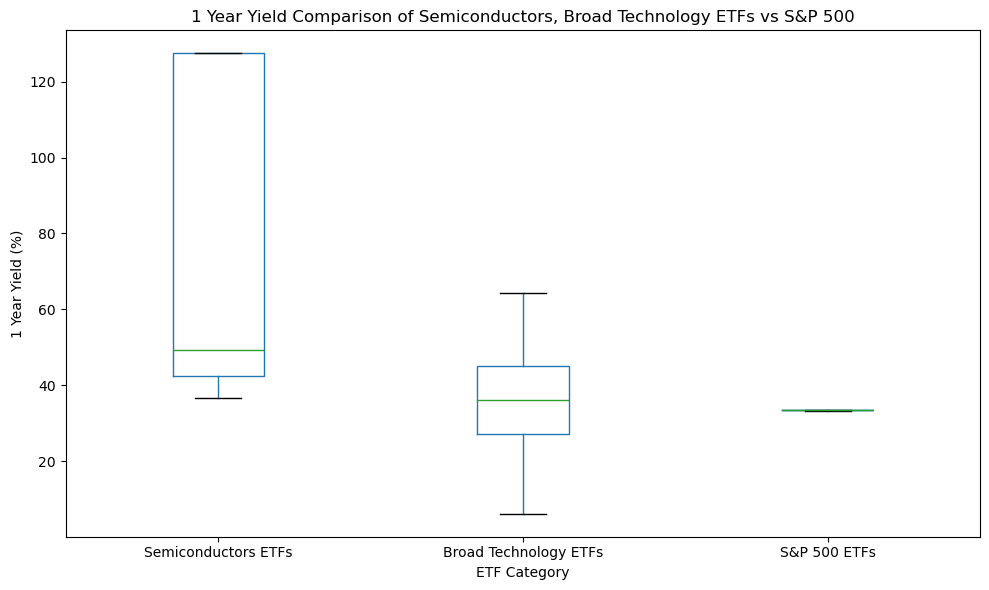

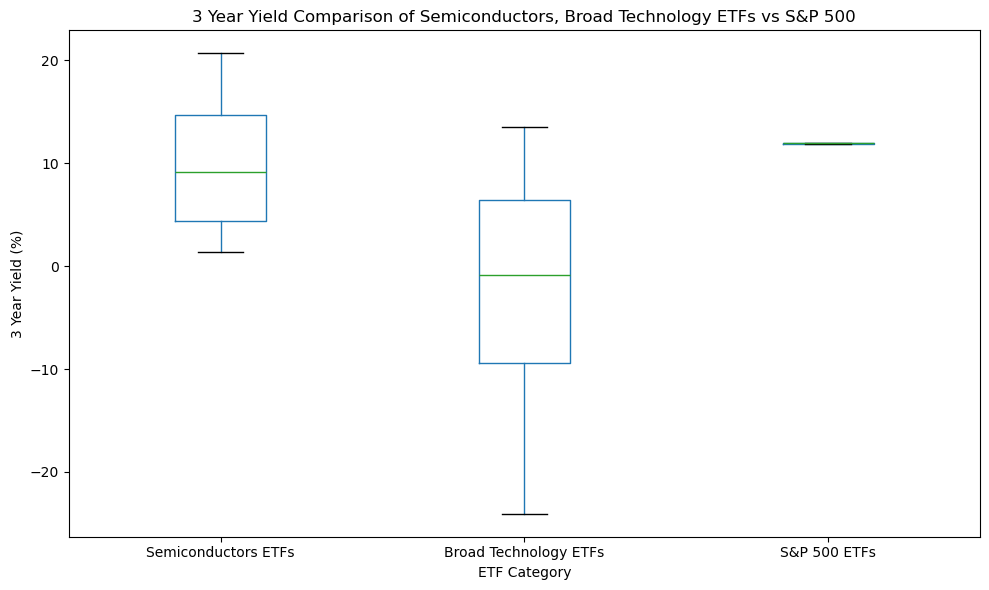

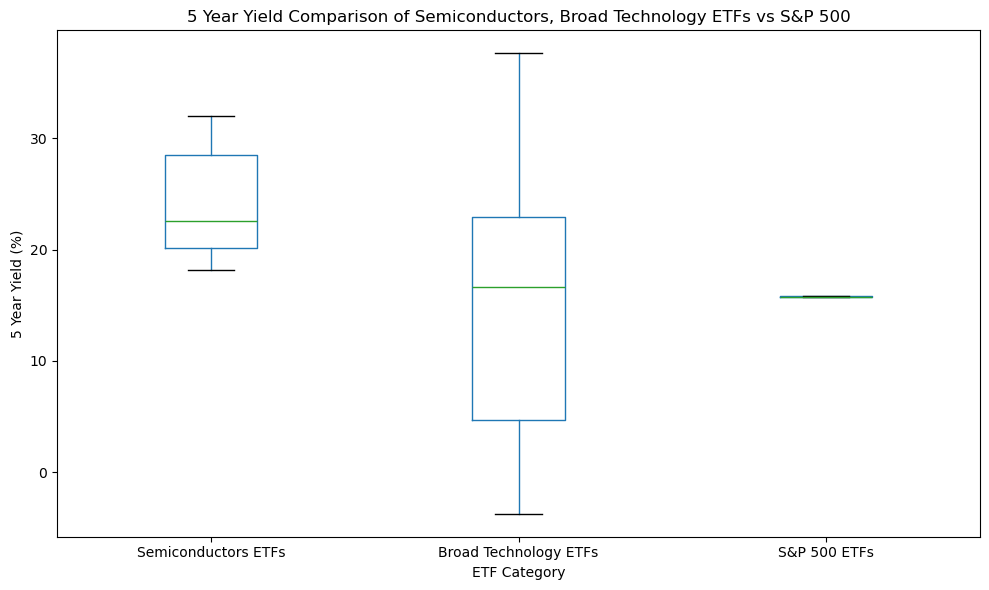


Comparison of Average Yields:
        Semiconductors ETFs Average Yield  \
1 Year                         132.077500   
3 Year                          10.520000   
5 Year                          28.354286   

        Broad Technology ETFs Average Yield  S&P 500 ETFs Average Yield  
1 Year                            43.821951                   33.370000  
3 Year                            -1.782419                   11.926667  
5 Year                            16.383171                   15.773333  

Sharpe Ratios for ETFs:
        Semiconductors Sharpe Ratio  Broad Technology Sharpe Ratio  \
1 Year                     0.856401                       1.306180   
3 Year                     0.617264                      -0.173004   
5 Year                     1.908119                       1.170962   

        S&P 500 ETFs Sharpe Ratio  
1 Year                 345.596298  
3 Year                 294.071710  
5 Year                 276.657886  

Semiconductors ETFs - Beta Summary Statis

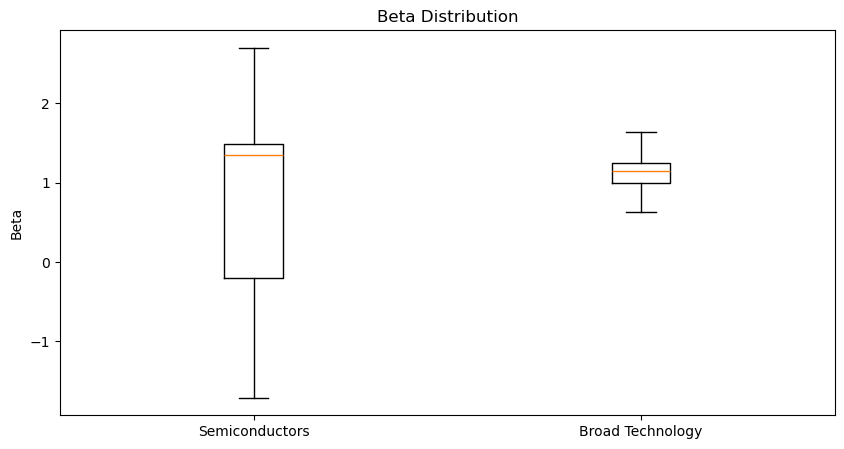

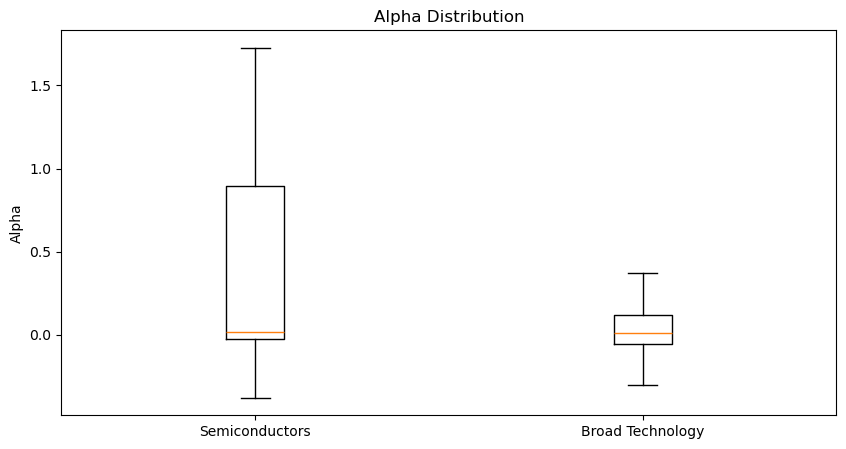

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
semiconductors_etfs = pd.read_csv('semiconductors_etf.csv')
broad_technology_etfs = pd.read_csv('broadtechnology_etf.csv')
sp_etf = pd.read_csv('sp_etf.csv', sep=';', decimal=',')  # Use decimal=',' for sp_etf

# Filter out rows where 'Inverse' column is 'No'
semiconductors_etfs = semiconductors_etfs[semiconductors_etfs['Inverse'] == 'No']
broad_technology_etfs = broad_technology_etfs[broad_technology_etfs['Inverse'] == 'No']

# Replace 'N/A' and other non-numeric values with NaN
semiconductors_etfs.replace('N/A', np.nan, inplace=True)
broad_technology_etfs.replace('N/A', np.nan, inplace=True)
sp_etf.replace('N/A', np.nan, inplace=True)

# Target columns for averaging
columns_to_average = ['1 Year', '3 Year', '5 Year']

# Function to clean numeric data (remove '%' and convert commas to dots)
def clean(series):
    return series.str.replace('%', '').str.replace(',', '.').astype(float)

semiconductors_etfs[columns_to_average] = semiconductors_etfs[columns_to_average].apply(clean)
broad_technology_etfs[columns_to_average] = broad_technology_etfs[columns_to_average].apply(clean)
sp_etf[columns_to_average] = sp_etf[columns_to_average].apply(clean)

# Prepare data for box plot by separating each year into individual DataFrames
for year in columns_to_average:
    plt.figure(figsize=(10, 6))
    plt.title(f"{year} Yield Comparison of Semiconductors, Broad Technology ETFs vs S&P 500")
    plt.xlabel("ETF Category")
    plt.ylabel(f"{year} Yield (%)")
    
    # Select data for the specific year
    year_data = pd.DataFrame({
        "Semiconductors ETFs": semiconductors_etfs[year].dropna(),
        "Broad Technology ETFs": broad_technology_etfs[year].dropna(),
        "S&P 500 ETFs": sp_etf[year].dropna()
    })
    
    # Plot each year individually
    year_data.boxplot(grid=False, showfliers=False)
    plt.tight_layout()
    plt.show()

# Calculate the average yields for each ETF category
semiconductors_avg_yields = semiconductors_etfs[columns_to_average].mean()
broad_technology_avg_yields = broad_technology_etfs[columns_to_average].mean()
sp_etf_avg_yields = sp_etf[columns_to_average].mean()

# Create a DataFrame for side-by-side comparison
comparison_df = pd.DataFrame({
    'Semiconductors ETFs Average Yield': semiconductors_avg_yields,
    'Broad Technology ETFs Average Yield': broad_technology_avg_yields,
    'S&P 500 ETFs Average Yield': sp_etf_avg_yields
})
print("\nComparison of Average Yields:")
print(comparison_df)

# Sharpe Ratio Calculation
# Assuming the risk-free rate is 4.19% (0.0419)
risk_free_rate = 0.0419

# Calculate excess returns
semiconductors_excess = semiconductors_avg_yields - risk_free_rate
broad_technology_excess = broad_technology_avg_yields - risk_free_rate
sp_etf_excess = sp_etf_avg_yields - risk_free_rate

# Calculate standard deviations of returns
semiconductors_std = semiconductors_etfs[columns_to_average].std()
broad_technology_std = broad_technology_etfs[columns_to_average].std()
sp_etf_std = sp_etf[columns_to_average].std()

# Compute Sharpe Ratios
semiconductors_sharpe = semiconductors_excess / semiconductors_std
broad_technology_sharpe = broad_technology_excess / broad_technology_std
sp_etf_sharpe = sp_etf_excess / sp_etf_std

# Display Sharpe Ratios
sharpe_ratios_df = pd.DataFrame({
    'Semiconductors Sharpe Ratio': semiconductors_sharpe,
    'Broad Technology Sharpe Ratio': broad_technology_sharpe,
    'S&P 500 ETFs Sharpe Ratio': sp_etf_sharpe
})
print("\nSharpe Ratios for ETFs:")
print(sharpe_ratios_df)

# Calculate Beta (convert to numeric)
semiconductors_etfs['Beta'] = pd.to_numeric(semiconductors_etfs['Beta'], errors='coerce')
broad_technology_etfs['Beta'] = pd.to_numeric(broad_technology_etfs['Beta'], errors='coerce')

# Calculate market return from S&P 500 ETF
market_return = sp_etf['1 Year'].iloc[0] / 100.0  # Convert percentage to decimal

# Calculate Alpha for each ETF category separately
semiconductors_etfs['Alpha'] = semiconductors_etfs.apply(
    lambda row: ((row['1 Year'] / 100) - risk_free_rate) -
                (market_return - risk_free_rate) * (row['Beta'] if pd.notnull(row['Beta']) else np.nan), 
    axis=1
)

broad_technology_etfs['Alpha'] = broad_technology_etfs.apply(
    lambda row: ((row['1 Year'] / 100) - risk_free_rate) -
                (market_return - risk_free_rate) * (row['Beta'] if pd.notnull(row['Beta']) else np.nan), 
    axis=1
)

# Print summary statistics for Beta and Alpha
print("\nSemiconductors ETFs - Beta Summary Statistics:")
print(semiconductors_etfs['Beta'].describe())

print("\nBroad Technology ETFs - Beta Summary Statistics:")
print(broad_technology_etfs['Beta'].describe())

print("\nSemiconductors ETFs - Alpha Summary Statistics:")
print(semiconductors_etfs['Alpha'].describe())

print("\nBroad Technology ETFs - Alpha Summary Statistics:")
print(broad_technology_etfs['Alpha'].describe())

# Plot Beta box plots side-by-side
plt.figure(figsize=(10, 5))
data_beta = [semiconductors_etfs['Beta'].dropna(), broad_technology_etfs['Beta'].dropna()]
plt.boxplot(data_beta, labels=['Semiconductors', 'Broad Technology'], showfliers=False)
plt.title('Beta Distribution')
plt.ylabel('Beta')
plt.show()

# Plot Alpha box plots side-by-side
plt.figure(figsize=(10, 5))
data_alpha = [semiconductors_etfs['Alpha'].dropna(), broad_technology_etfs['Alpha'].dropna()]
plt.boxplot(data_alpha, labels=['Semiconductors', 'Broad Technology'], showfliers=False)
plt.title('Alpha Distribution')
plt.ylabel('Alpha')
plt.show()
